# What drives the price of a car?

![](images/kurt.jpeg)

**OVERVIEW**

In this application, you will explore a dataset from Kaggle. The original dataset contained information on 3 million used cars. The provided dataset contains information on 426K cars to ensure speed of processing.  Your goal is to understand what factors make a car more or less expensive.  As a result of your analysis, you should provide clear recommendations to your client -- a used car dealership -- as to what consumers value in a used car.

### CRISP-DM Framework

<center>
    <img src = images/crisp.png width = 50%/>
</center>


To frame the task, throughout our practical applications, we will refer back to a standard process in industry for data projects called CRISP-DM.  This process provides a framework for working through a data problem.  Your first step in this application will be to read through a brief overview of CRISP-DM [here](https://mo-pcco.s3.us-east-1.amazonaws.com/BH-PCMLAI/module_11/readings_starter.zip).  After reading the overview, answer the questions below.

In [1]:
import plotly.express as px
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats

from sklearn.linear_model import LinearRegression, Lasso
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.feature_selection import SequentialFeatureSelector, SelectFromModel
from sklearn.preprocessing import StandardScaler, PolynomialFeatures, OneHotEncoder, OrdinalEncoder
from sklearn.linear_model import Ridge
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error
from sklearn.compose import make_column_transformer, make_column_selector, ColumnTransformer


## Business Understanding

From a business perspective, we are tasked with identifying key drivers for used car prices.  In the CRISP-DM overview, we are asked to convert this business framing to a data problem definition.  Using a few sentences, reframe the task as a data task with the appropriate technical vocabulary. 

#### Determine business objectives
A used car dealership is looking to optimize its pricing strategy by identifying key factors that influence the price of used cars. The goal is to understand what attributes consumers value most and how these attributes affect vehicle pricing. By analyzing a dataset of 426,000 used cars, we aim to uncover patterns and relationships that drive price variations.


#### Determine data mining goals
From a data perspective, this translates into a supervised machine learning problem, specifically a regression task, where the target variable is the price of a used car. The independent variables may include factors such as make, model, mileage, year, condition, location, and other relevant attributes. 

#### Produce project plan
Using exploratory data analysis and predictive modeling techniques, we will identify the most significant predictors of price and provide actionable insights to the dealership.

In [2]:
# What other factors aside from price will effect the business
# - how long will a particular car stay on the lot?

## Data Understanding

After considering the business understanding, we want to get familiar with our data.  Write down some steps that you would take to get to know the dataset and identify any quality issues within.  Take time to get to know the dataset and explore what information it contains and how this could be used to inform your business understanding.

In [3]:
# Initialize dataset
df = pd.read_csv('data/vehicles.csv').set_index('id')
original_df = df.copy()
print(df.head())

                            region  price  year manufacturer model condition  \
id                                                                             
7222695916                prescott   6000   NaN          NaN   NaN       NaN   
7218891961            fayetteville  11900   NaN          NaN   NaN       NaN   
7221797935            florida keys  21000   NaN          NaN   NaN       NaN   
7222270760  worcester / central MA   1500   NaN          NaN   NaN       NaN   
7210384030              greensboro   4900   NaN          NaN   NaN       NaN   

           cylinders fuel  odometer title_status transmission  VIN drive size  \
id                                                                              
7222695916       NaN  NaN       NaN          NaN          NaN  NaN   NaN  NaN   
7218891961       NaN  NaN       NaN          NaN          NaN  NaN   NaN  NaN   
7221797935       NaN  NaN       NaN          NaN          NaN  NaN   NaN  NaN   
7222270760       NaN  NaN       Na

In [4]:
# Display column names and data types
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 426880 entries, 7222695916 to 7301591129
Data columns (total 17 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   region        426880 non-null  object 
 1   price         426880 non-null  int64  
 2   year          425675 non-null  float64
 3   manufacturer  409234 non-null  object 
 4   model         421603 non-null  object 
 5   condition     252776 non-null  object 
 6   cylinders     249202 non-null  object 
 7   fuel          423867 non-null  object 
 8   odometer      422480 non-null  float64
 9   title_status  418638 non-null  object 
 10  transmission  424324 non-null  object 
 11  VIN           265838 non-null  object 
 12  drive         296313 non-null  object 
 13  size          120519 non-null  object 
 14  type          334022 non-null  object 
 15  paint_color   296677 non-null  object 
 16  state         426880 non-null  object 
dtypes: float64(2), int64(1), object(14)
memo

In [5]:
# Check summary stats
print(df.describe())

              price           year      odometer
count  4.268800e+05  425675.000000  4.224800e+05
mean   7.519903e+04    2011.235191  9.804333e+04
std    1.218228e+07       9.452120  2.138815e+05
min    0.000000e+00    1900.000000  0.000000e+00
25%    5.900000e+03    2008.000000  3.770400e+04
50%    1.395000e+04    2013.000000  8.554800e+04
75%    2.648575e+04    2017.000000  1.335425e+05
max    3.736929e+09    2022.000000  1.000000e+07


In [6]:
# Identify Missing values
print(df.isnull().sum())

region               0
price                0
year              1205
manufacturer     17646
model             5277
condition       174104
cylinders       177678
fuel              3013
odometer          4400
title_status      8242
transmission      2556
VIN             161042
drive           130567
size            306361
type             92858
paint_color     130203
state                0
dtype: int64


In [7]:
# Check for duplicates
print(df.duplicated().sum())

56202


In [8]:
# Explore Data
# Understand unique categorical values
for col in df.select_dtypes(include='object').columns:
    print(f"{col}: {df[col].nunique()} unique values")

region: 404 unique values
manufacturer: 42 unique values
model: 29649 unique values
condition: 6 unique values
cylinders: 8 unique values
fuel: 5 unique values
title_status: 6 unique values
transmission: 3 unique values
VIN: 118246 unique values
drive: 3 unique values
size: 4 unique values
type: 13 unique values
paint_color: 12 unique values
state: 51 unique values


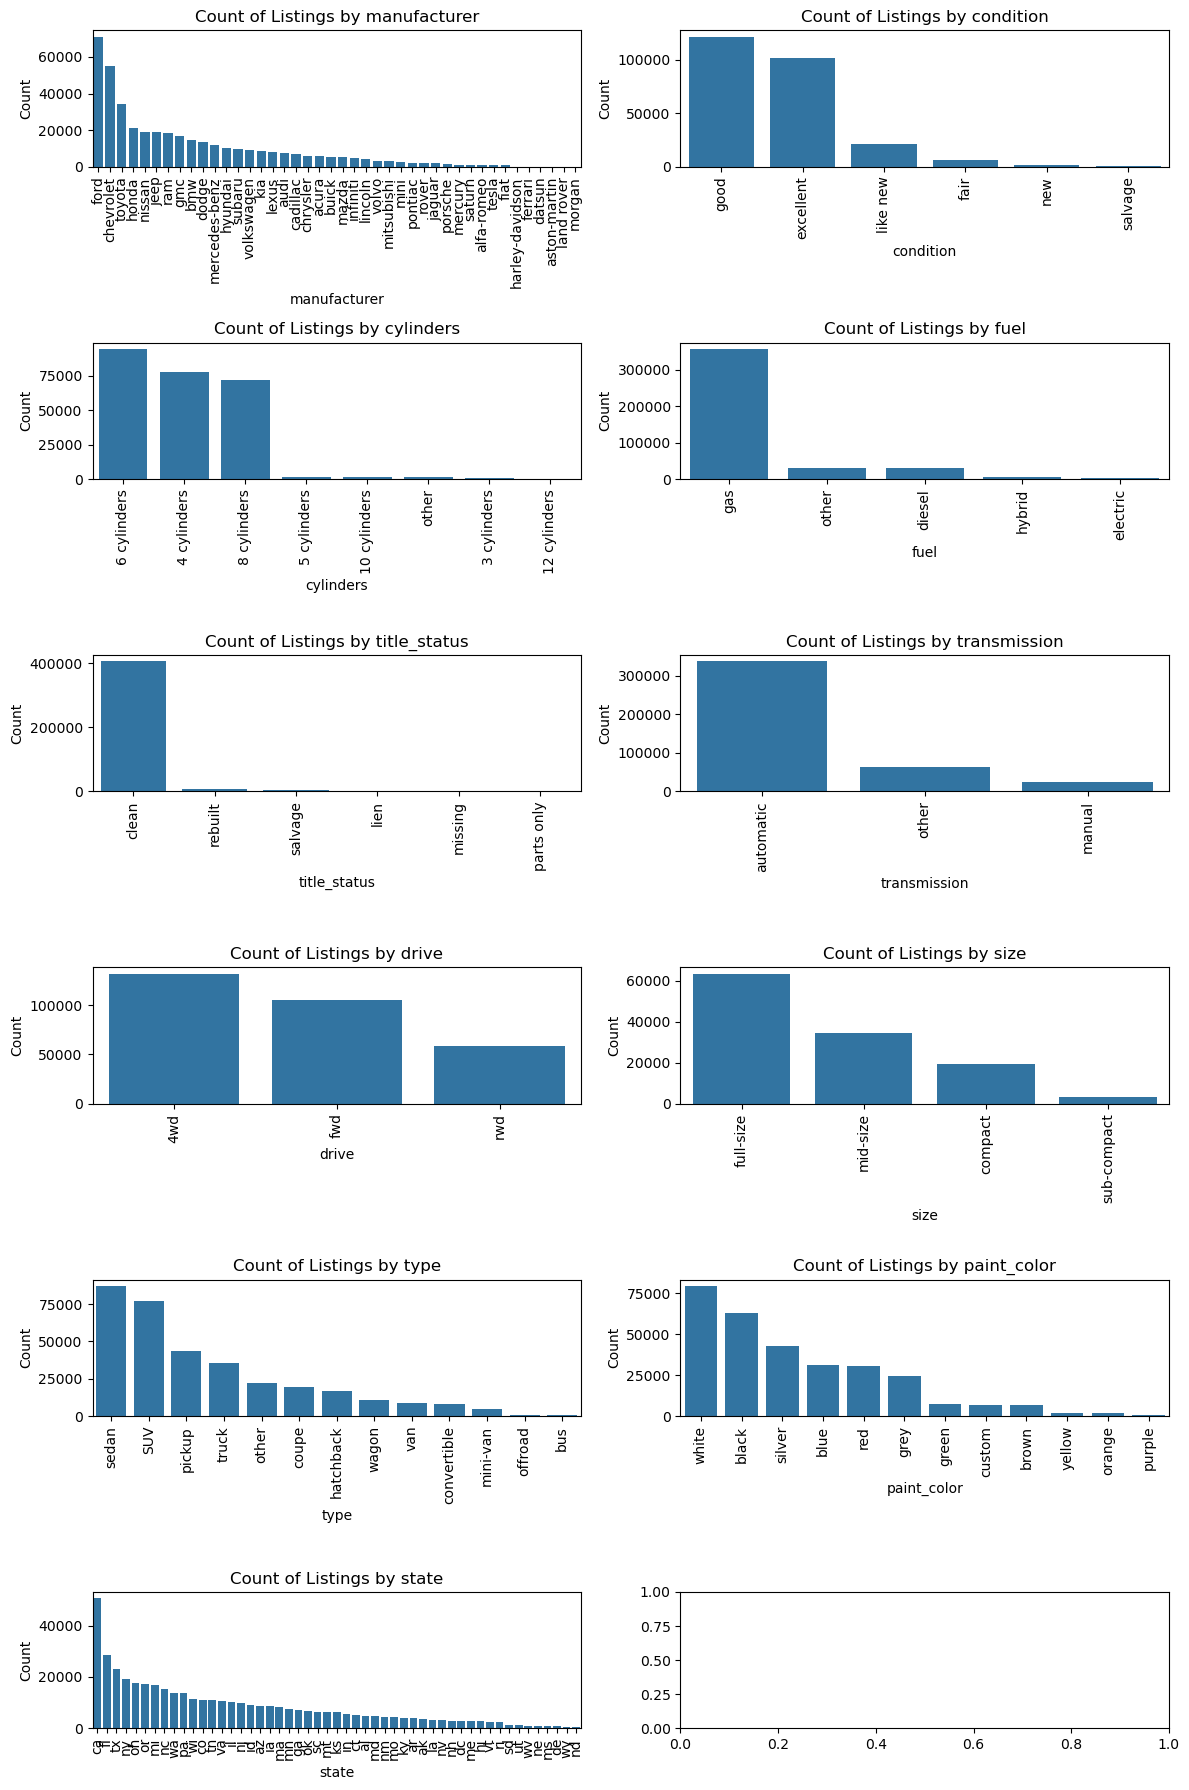

In [9]:
# Visualize categorical features

# There are too many model types to visualize
column_names = ["manufacturer", "condition", "cylinders", "fuel", "title_status", "transmission", "drive", "size", "type", "paint_color", "state"]
num_columns = len(column_names)
plots_per_row = 2
num_rows = int(len(column_names) / plots_per_row + 1)
    
# Create subplots
fig, axes = plt.subplots(num_rows, plots_per_row, figsize=(plots_per_row * 6, num_rows * 3))  # Adjust figure size based on the number of columns

axes = axes.flatten()

# If there is only one column, axes is not a list, so we ensure it is iterable
if num_columns == 1:
    axes = [axes]

# Plot each categorical column
for i, column_name in enumerate(column_names):
    sns.countplot(x=original_df[column_name], order=df[column_name].value_counts().index, ax=axes[i])
    axes[i].tick_params(axis='x', rotation=90)
    axes[i].set_title(f"Count of Listings by {column_name}")
    axes[i].set_xlabel(column_name)
    axes[i].set_ylabel("Count")

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plots
plt.show()

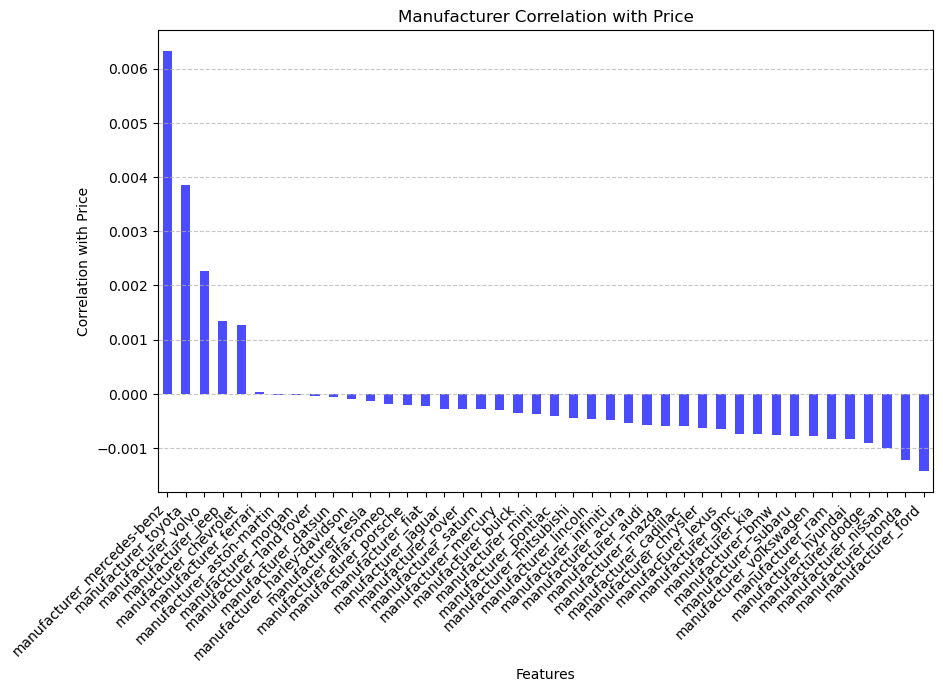

In [10]:
# Lets look at a correlation matrix for some categorical features
def categorical_corr_matrix(df):
    """Creates a correlation matrix for categorical features using one-hot encoding."""
    
    # One-hot encode categorical features
    df_encoded = pd.get_dummies(df)
    # df.select_dtypes(include=["object"]).drop(['region', 'VIN'], axis=1)

    corr_matrix = df_encoded.corr()

    # Compute Pearson correlation
    price_corr = corr_matrix["price"].drop("price").sort_values(ascending=False)

    # Plot the correlations
    plt.figure(figsize=(10, 6))
    price_corr.plot(kind="bar", color="blue", alpha=0.7)
    plt.xlabel("Features")
    plt.ylabel("Correlation with Price")
    plt.title("Manufacturer Correlation with Price")
    plt.xticks(rotation=45, ha="right")
    plt.grid(axis="y", linestyle="--", alpha=0.7)
    plt.show()

# Example usage:
categorical_corr_matrix(original_df[["manufacturer", "price"]])

<Figure size 1000x600 with 0 Axes>

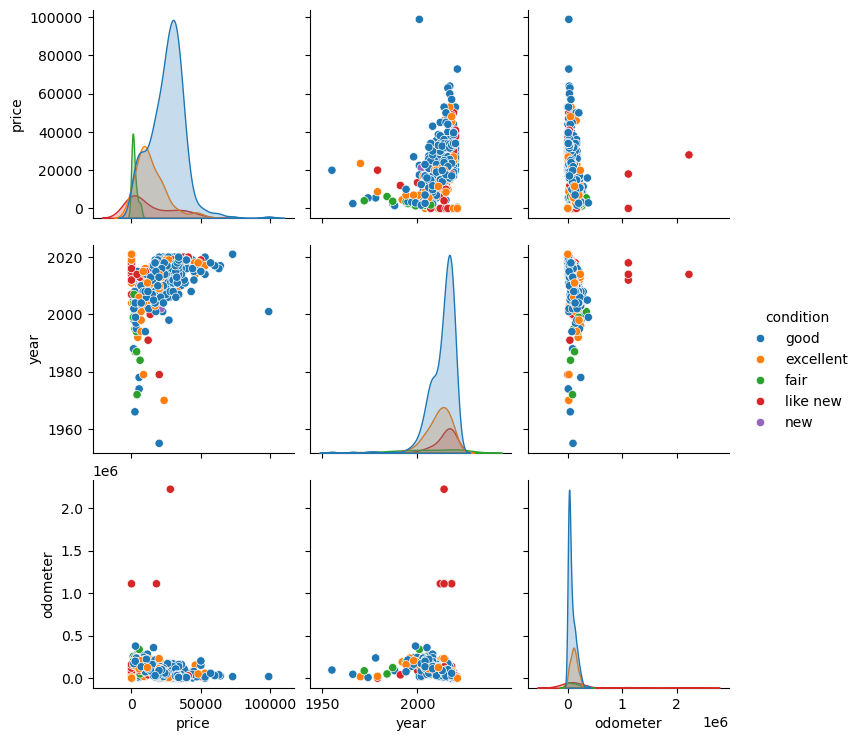

In [11]:
# Lets look at a correlation matrix for all numeric features
corr_matrix = df[['price', 'year', 'odometer']].corr()
plt.figure(figsize=(10, 6))
sns.pairplot(df[['price', 'year', 'odometer', 'condition']].head(1000), hue = 'condition')
# sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')

plt.show()



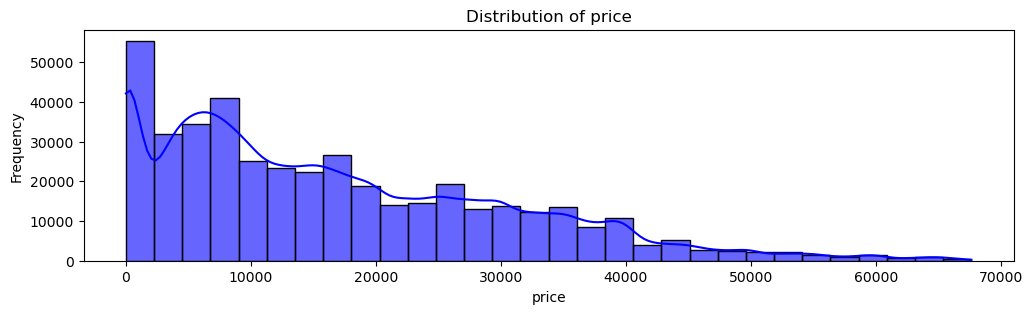

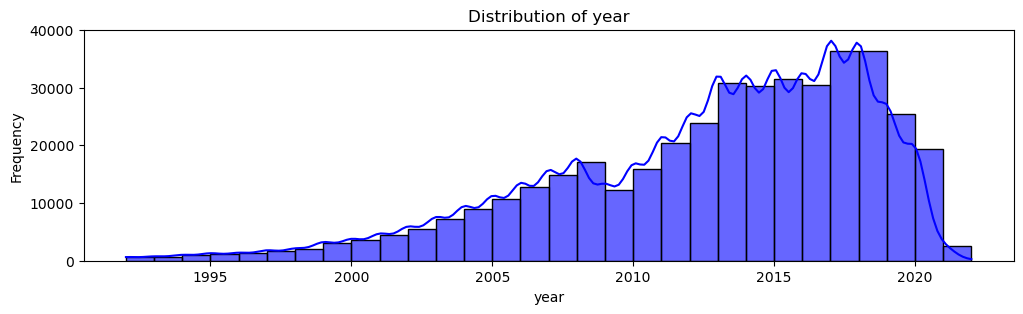

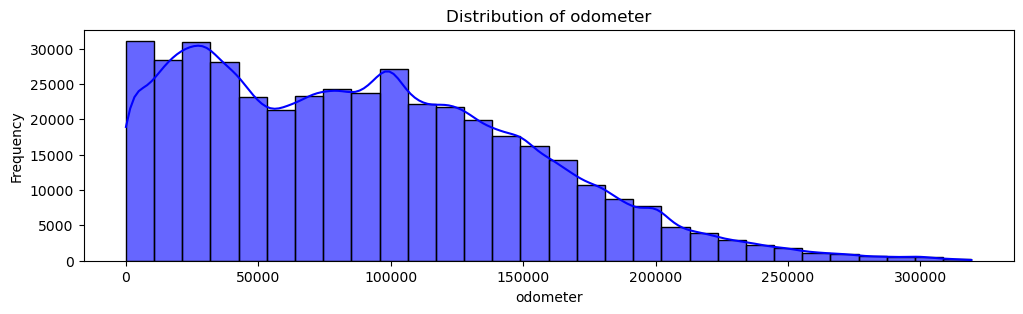

In [12]:
def plot_histograms_with_distribution(df: pd.DataFrame, bins=30):
    """
    Plots a histogram for each numerical column in the DataFrame with its KDE distribution.

    Parameters:
        df (pd.DataFrame): The input DataFrame.
        bins (int): Number of bins for the histogram (default: 30).

    Returns:
        None
    """
    num_columns = df.select_dtypes(include=['int64', 'float64']).columns
    
    for column in num_columns:
        # Compute IQR for outlier detection
        Q1 = df[column].quantile(0.2)
        Q3 = df[column].quantile(0.8)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        # Filter outliers
        filtered_data = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)][column]

        if filtered_data.empty:
            print(f"Skipping {column} (no data after outlier removal)")
            continue  # Skip if no data remains after outlier filtering

        plt.figure(figsize=(12, 3))
        sns.histplot(filtered_data, bins=bins, kde=True, color='blue', alpha=0.6)
        plt.title(f'Distribution of {column}')
        plt.xlabel(column)
        plt.ylabel('Frequency')
        plt.show()

plot_histograms_with_distribution(df)


### Data Preparation

After our initial exploration and fine-tuning of the business understanding, it is time to construct our final dataset prior to modeling.  Here, we want to make sure to handle any integrity issues and cleaning, the engineering of new features, any transformations that we believe should happen (scaling, logarithms, normalization, etc.), and general preparation for modeling with `sklearn`. 

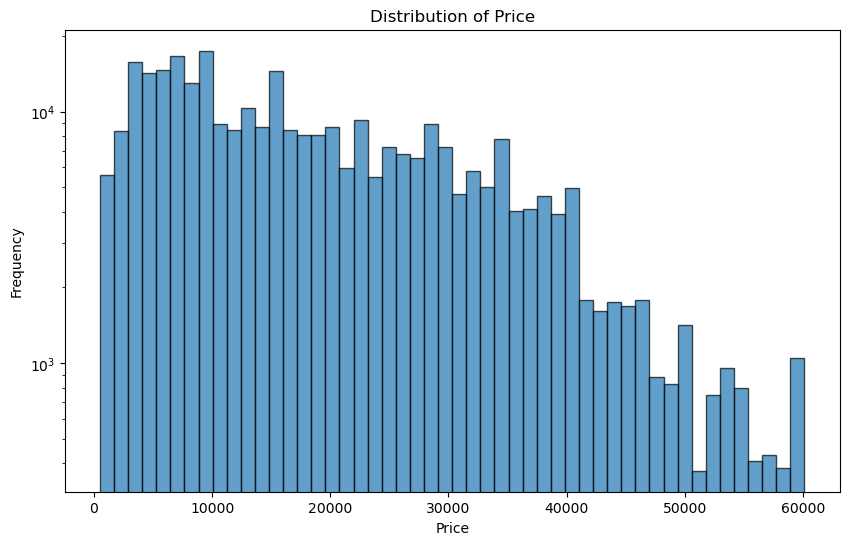

<class 'pandas.core.frame.DataFrame'>
Index: 309161 entries, 7316814884 to 7301591129
Data columns (total 14 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   region        309161 non-null  object 
 1   price         309161 non-null  int64  
 2   year          309161 non-null  float64
 3   manufacturer  309161 non-null  object 
 4   model         309161 non-null  object 
 5   condition     309161 non-null  object 
 6   fuel          309161 non-null  object 
 7   odometer      309161 non-null  float64
 8   title_status  309161 non-null  object 
 9   transmission  309161 non-null  object 
 10  drive         309161 non-null  object 
 11  type          309161 non-null  object 
 12  paint_color   309161 non-null  object 
 13  state         309161 non-null  object 
dtypes: float64(2), int64(1), object(11)
memory usage: 35.4+ MB
None


In [13]:
# Clean data
# Note: We used the charts above to identify incomplete, inconsistent and incorrect data in our dataset. Instead of
# explicitly cleaning certain features I tried my best to clean algorithmically. For instance, instead of
# removing title_status values other than 'clean', this is done automatically in the drop_categorical_outliers function
# by droping any category values whose value count is less than %5 of the average value count for that feature. This simplified my
# cleaning significantly and reduces the need to make changes to our data preparation strategy if our more data is added to our dataset.

# Drop columns
def drop_columns(df: pd.DataFrame) -> pd.DataFrame:
    # Size is missing from a large porition of the dataset
    df = df.drop(["size", "cylinders"], axis=1)
    # VIN has high cardinality because it is a identifier ID
    df = df.drop(["VIN"], axis=1)
    return df

def drop_categorical_outliers(df: pd.DataFrame) -> pd.DataFrame:
    for col in df.select_dtypes(include=['object', 'category']).columns:
        # Get the value counts of the categories
        value_counts = df[col].value_counts()

        # Calculate the threshold of as 10% of the mean value count for the column
        unique_threshold = value_counts.mean() * 0.05

        # Find categories that appear less frequently than the threshold
        rare_categories = value_counts.index[value_counts < unique_threshold]
        
        # Remove rows with infrequent categories
        df = df[~df[col].isin(rare_categories)]
        # print(f"Removed categories {list(rare_categories)} from column \"{col}\"")
        
    return df


# Drop numerical column outliers
def drop_numerical_outliers(df: pd.DataFrame) -> pd.DataFrame:
    num_columns = df.select_dtypes(include=['int64', 'float64']).columns
    
    # drop prices below 500
    df = df[df['price'] > 500]

    # print(f"filtered_columns {filtered_columns}")
    for col in num_columns:
        Q1 = df[col].quantile(0.2)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1  # Interquartile range

        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # print(f"{col} bounds {lower_bound} to {upper_bound}")

        # Filter out values outside the IQR range
        df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
    return df

def fill_missing_values(df: pd.DataFrame) -> pd.DataFrame:
    num_columns = df.select_dtypes(include=['int64', 'float64']).columns
    cat_columns = df.columns.difference(num_columns)
    
    # Fill NaN values with the column mean
    df[num_columns] = df[num_columns].fillna(df[num_columns].mean())  # Fill with mean for numerical columns

    # # Fill in missing conditions as fair
    # df['condition'] = df['condition'].fillna('fair')
    
    # Fill remaining missing categorical column with 'Unknown'
    df[cat_columns] = df[cat_columns].fillna('Unknown')
    return df

def drop_incorrect_values(df: pd.DataFrame) -> pd.DataFrame:
    # Drop remaining missing values
    df = df.dropna()
    
    # Drop duplicates
    df = df.drop_duplicates()
    return df

def clean_features(df):
    df = drop_columns(df)
    df = drop_categorical_outliers(df)
    df = drop_numerical_outliers(df)
    df = fill_missing_values(df)
    df = drop_incorrect_values(df)
    return df


test_df = clean_features(original_df)

plt.figure(figsize=(10, 6))
plt.hist(test_df['price'], bins=50, edgecolor='black', alpha=0.7)
plt.title("Distribution of Price")
plt.xlabel("Price")
plt.ylabel("Frequency")
plt.yscale("log")  # Log scale helps if there are extreme price values
plt.show()


# Check
print(test_df.info())

In [14]:
# Feature Engineering: Create new, relevant features based on existing ones.

def add_column_popularity(df, column):
    if column not in df.columns:
        return df
    value_counts = df[column].value_counts(normalize=True)
    df[f"{column}_popularity"] = df[column].map(value_counts)
    return df

def target_encode_column(df, column):
    if column not in df.columns:
        return df
    mean_encoded = df.groupby(column)['price'].mean()
    df[f"{column}_encoded"] = df[column].map(mean_encoded)
    df = df.drop(column, axis=1)
    return df

def create_features(df):
    df = add_column_popularity(df, 'state')
    df = add_column_popularity(df, 'manufacturer')
    df = add_column_popularity(df, 'model')
    df = target_encode_column(df, 'manufacturer')
    df = target_encode_column(df, 'cylinders')
    df = target_encode_column(df, 'state')
    df = target_encode_column(df, 'model')
    df = target_encode_column(df, 'paint_color')
    df = target_encode_column(df, 'region')
    df = target_encode_column(df, 'type')

    
    
    return df

test_df = create_features(test_df)

# Check
print(test_df.info())
print(test_df.head())

<class 'pandas.core.frame.DataFrame'>
Index: 309161 entries, 7316814884 to 7301591129
Data columns (total 17 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   price                    309161 non-null  int64  
 1   year                     309161 non-null  float64
 2   condition                309161 non-null  object 
 3   fuel                     309161 non-null  object 
 4   odometer                 309161 non-null  float64
 5   title_status             309161 non-null  object 
 6   transmission             309161 non-null  object 
 7   drive                    309161 non-null  object 
 8   state_popularity         309161 non-null  float64
 9   manufacturer_popularity  309161 non-null  float64
 10  model_popularity         309161 non-null  float64
 11  manufacturer_encoded     309161 non-null  float64
 12  state_encoded            309161 non-null  float64
 13  model_encoded            309161 non-null  float64
 

In [15]:
# Transformation: Apply transformations like scaling, normalization, or logarithmic transformations as needed.
# Encode categorical and ordinal features

def transform_features(df):
    exclude_columns = ["price"]
    num_columns = df.select_dtypes(include=['int64', 'float64']).columns.difference(exclude_columns)
    orb_columns = ["condition"]
    cat_columns = df.select_dtypes(exclude=['int64', 'float64']).columns.difference(orb_columns).difference(exclude_columns)
    
    # print(num_columns)
    # print(orb_columns)
    # print(cat_columns)
    
    # scale/normalize numerical data
    column_transformer = ColumnTransformer(
        transformers=[
            ('one_hot_encode', OneHotEncoder(drop='if_binary', handle_unknown='ignore'), cat_columns),
            ('ordinal_encode', OrdinalEncoder(categories = [['Unknown', 'fair', 'good', 'excellent', 'like new']]), orb_columns),
            ('scaler', StandardScaler(), num_columns)
        ],
        remainder='passthrough'
    )

    # # Apply transformation
    transformed_data = column_transformer.fit_transform(df)
    transformed_data = transformed_data

    # # Get feature names for the encoded columns
    one_hot_feature_names = column_transformer.named_transformers_['one_hot_encode'].get_feature_names_out(cat_columns)
    ordinal_feature_names = column_transformer.named_transformers_['ordinal_encode'].get_feature_names_out(orb_columns)
    all_feature_names = list(one_hot_feature_names) + list(orb_columns) + list(num_columns) + list(exclude_columns)
    # print(all_feature_names)

    if transformed_data.shape[1] != len(all_feature_names):
        raise ValueError(f"Mismatch: Data has {transformed_data.shape[1]} columns, but {len(all_feature_names)} feature names were provided.")

    # Construct new dataframe with transformed features
    df = pd.DataFrame(transformed_data, columns=(all_feature_names))
    return df

test_df = transform_features(test_df)
print(test_df.info())
print(test_df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309161 entries, 0 to 309160
Data columns (total 30 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   drive_4wd                309161 non-null  float64
 1   drive_Unknown            309161 non-null  float64
 2   drive_fwd                309161 non-null  float64
 3   drive_rwd                309161 non-null  float64
 4   fuel_Unknown             309161 non-null  float64
 5   fuel_diesel              309161 non-null  float64
 6   fuel_gas                 309161 non-null  float64
 7   fuel_hybrid              309161 non-null  float64
 8   fuel_other               309161 non-null  float64
 9   title_status_Unknown     309161 non-null  float64
 10  title_status_clean       309161 non-null  float64
 11  title_status_rebuilt     309161 non-null  float64
 12  title_status_salvage     309161 non-null  float64
 13  transmission_Unknown     309161 non-null  float64
 14  tran

In [16]:
# Model Preparation: split into features and target, and divide into training/testing sets.

def split_data(input_df):
    X = input_df.drop('price', axis = 1)
    y = input_df['price']
    # TODO: is there a better way to do this using folds?
    return train_test_split(X, y, test_size=0.3, random_state=42)

X_train, X_test, y_train, y_test = split_data(test_df)
X_train.head()

,drive_4wd,drive_Unknown,drive_fwd,drive_rwd,fuel_Unknown,fuel_diesel,fuel_gas,fuel_hybrid,fuel_other,title_status_Unknown,...,manufacturer_popularity,model_encoded,model_popularity,odometer,paint_color_encoded,region_encoded,state_encoded,state_popularity,type_encoded,year
179834,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.769153,-0.128988,0.830518,-0.293494,1.108278,0.200722,0.270900,-1.037491,0.734220,0.296090
304982,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,-0.992115,0.207211,-0.591606,1.190740,-0.575231,-0.218622,-0.942340,-0.307918,-0.747174,-0.401219
201326,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,-0.559072,-0.734821,-0.439457,-1.114724,-0.594539,-0.693417,-0.114763,0.293268,-0.790979,0.644745
255748,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,-0.262548,-0.894663,1.657502,0.110733,1.108278,1.053914,0.890120,-0.408493,-0.790979,0.470418
21716,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.769153,-1.010608,-0.256258,-0.792663,-0.594539,-0.915832,-0.098764,2.388202,-0.576459,1.167727


In [17]:
# Create helper method for reseting data

def refreshData():
    df = clean_features(original_df)
    df = create_features(df)
    df = transform_features(df)
    return df

def refreshTrainData():
    df = refreshData()
    X_train, X_test, y_train, y_test = split_data(df)
    return X_train, X_test, y_train, y_test

X_train, X_test, y_train, y_test = refreshTrainData()
X_train.head()
    

,drive_4wd,drive_Unknown,drive_fwd,drive_rwd,fuel_Unknown,fuel_diesel,fuel_gas,fuel_hybrid,fuel_other,title_status_Unknown,...,manufacturer_popularity,model_encoded,model_popularity,odometer,paint_color_encoded,region_encoded,state_encoded,state_popularity,type_encoded,year
179834,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.769153,-0.128988,0.830518,-0.293494,1.108278,0.200722,0.270900,-1.037491,0.734220,0.296090
304982,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,-0.992115,0.207211,-0.591606,1.190740,-0.575231,-0.218622,-0.942340,-0.307918,-0.747174,-0.401219
201326,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,-0.559072,-0.734821,-0.439457,-1.114724,-0.594539,-0.693417,-0.114763,0.293268,-0.790979,0.644745
255748,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,-0.262548,-0.894663,1.657502,0.110733,1.108278,1.053914,0.890120,-0.408493,-0.790979,0.470418
21716,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.769153,-1.010608,-0.256258,-0.792663,-0.594539,-0.915832,-0.098764,2.388202,-0.576459,1.167727


### Modeling

With your (almost?) final dataset in hand, it is now time to build some models.  Here, you should build a number of different regression models with the price as the target.  In building your models, you should explore different parameters and be sure to cross-validate your findings.

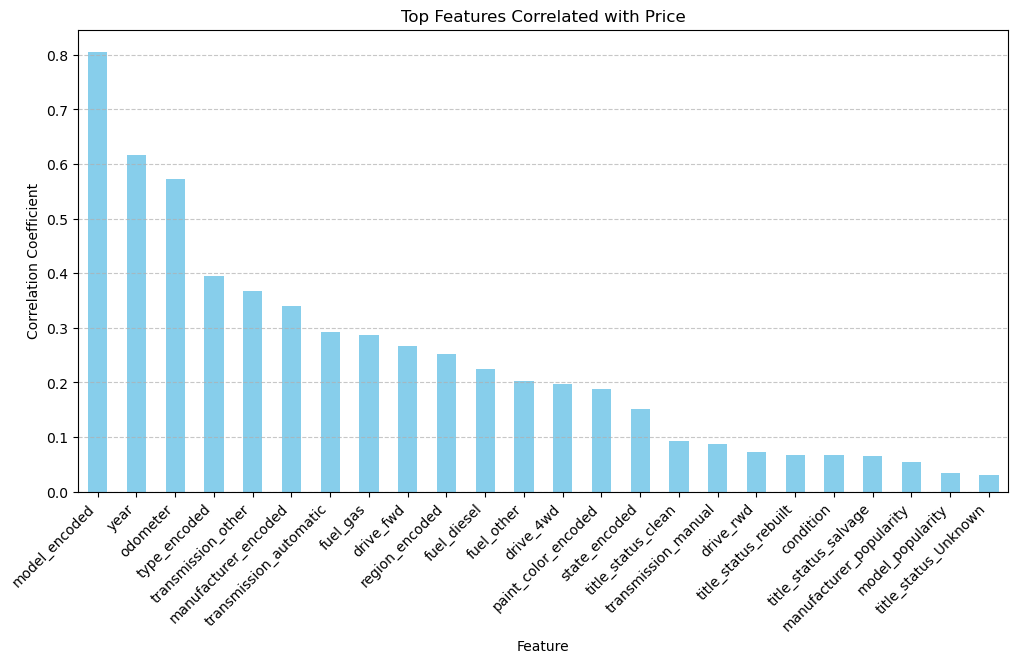

In [18]:
# Determine which features strongly correlate with price.
comparison_df = refreshData()

corr_matrix = comparison_df.corr()
price_corr = corr_matrix["price"].dropna()

top_corr = price_corr.abs().sort_values(ascending=False).head(25)

plt.figure(figsize=(12, 6))
top_corr[1:].plot(kind="bar", color="skyblue")

plt.title("Top Features Correlated with Price")
plt.xlabel("Feature")
plt.ylabel("Correlation Coefficient")
plt.xticks(rotation=45, ha="right", fontsize=10)
plt.grid(axis="y", linestyle="--", alpha=0.7)

# Show the plot
plt.show()

   degree     train_mse      test_mse
0       1  3.767185e+07  3.728156e+07
1       2  3.455677e+07  3.408135e+07
2       3  3.245814e+07  3.209514e+07
3       4  3.169699e+07  3.140763e+07
4       5  3.110999e+07  3.084444e+07
5       6  3.064154e+07  3.046452e+07
6       7  3.019585e+07  3.012121e+07
7       8  2.964852e+07  3.055797e+07


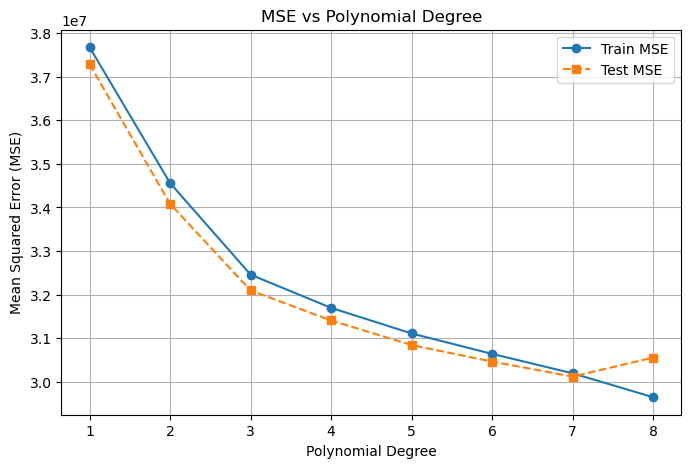

In [19]:
# Choose degree hyperparameter

# Select only top correlated features
top_features = top_corr[:21].index


df = refreshData()[top_features[:6]]
X_train, X_test, y_train, y_test = split_data(df)
X_train.head()

results = []
for degree in range(1, 9):
    # Create pipeline
    sequential_pipe = Pipeline([
        ('poly_features', PolynomialFeatures(degree = degree, include_bias = False)),
        ('linreg', LinearRegression())])
    
    sequential_pipe.fit(X_train, y_train)
    
    model_train_mse = mean_squared_error(y_train, sequential_pipe.predict(X_train))
    model_test_mse = mean_squared_error(y_test, sequential_pipe.predict(X_test))
    results.append({'degree': degree, 'train_mse': model_train_mse, 'test_mse': model_test_mse})
    
results_df = pd.DataFrame(results)
print(results_df)

plt.figure(figsize=(8, 5))
plt.plot(results_df['degree'], results_df['train_mse'], label='Train MSE', marker='o')
plt.plot(results_df['degree'], results_df['test_mse'], label='Test MSE', marker='s', linestyle='--')

# Add labels and title
plt.xlabel('Polynomial Degree')
plt.ylabel('Mean Squared Error (MSE)')
plt.title('MSE vs Polynomial Degree')
plt.legend()
plt.grid(True)
plt.show()

# It appears a degree of 5 is 

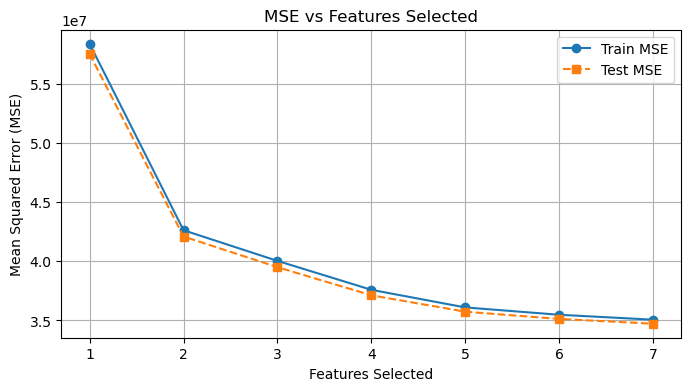

In [20]:
# Step 2
# Sequential Feature Selection

df = refreshData()[top_features]
X_train, X_test, y_train, y_test = split_data(df)

results = []
for features_to_select in range(1, 8):
    sequential_pipe = Pipeline([
        ('poly_features', PolynomialFeatures(degree = 1, include_bias = False)),
        ('selector', SequentialFeatureSelector(LinearRegression(), n_features_to_select=features_to_select)),
        ('linreg', LinearRegression())])
    
    sequential_pipe.fit(X_train, y_train)

    model_train_mse = mean_squared_error(y_train, sequential_pipe.predict(X_train))
    model_test_mse = mean_squared_error(y_test, sequential_pipe.predict(X_test))
    results.append({'features_to_select': features_to_select, 'train_mse': model_train_mse, 'test_mse': model_test_mse})
    
results_df = pd.DataFrame(results)
results_df.head()

plt.figure(figsize=(8, 4))
plt.plot(results_df['features_to_select'], results_df['train_mse'], label='Train MSE', marker='o')
plt.plot(results_df['features_to_select'], results_df['test_mse'], label='Test MSE', marker='s', linestyle='--')

# Add labels and title
plt.xlabel('Features Selected')
plt.ylabel('Mean Squared Error (MSE)')
plt.title('MSE vs Features Selected')
plt.legend()
plt.grid(True)
plt.show()

In [21]:
# # Get feature names after PolynomialFeatures
poly_features = sequential_pipe.named_steps['poly_features']
poly_feature_names = poly_features.get_feature_names_out(input_features=X_train.columns)

# Get selected columns
mask = sequential_pipe.named_steps['selector'].get_support()
selected_feature_names = np.array(poly_feature_names)[mask]

# Print the final feature names
print(selected_feature_names)

['model_encoded' 'year' 'odometer' 'transmission_other' 'fuel_diesel'
 'drive_4wd' 'title_status_clean']


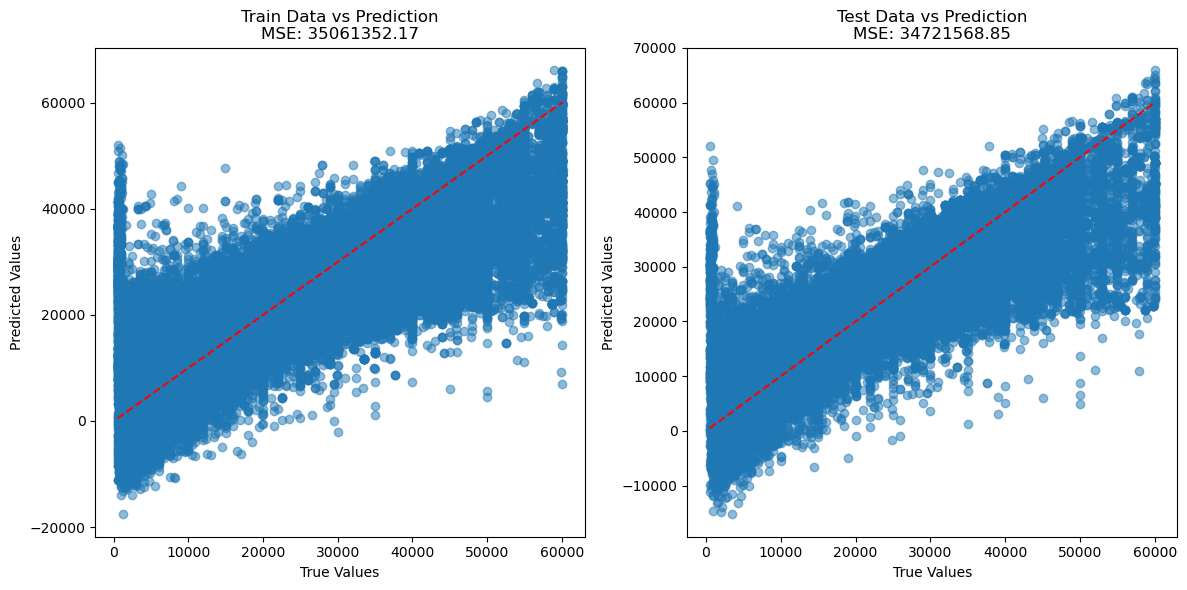

In [22]:
# Selected degree and features

df = refreshData()[[*selected_feature_names, "price"]]
X_train, X_test, y_train, y_test = split_data(df)


selected_feature_pipe = Pipeline([
    ('poly_features', PolynomialFeatures(degree = 1, include_bias = False)),
    ('linreg', LinearRegression())])

selected_feature_pipe.fit(X_train, y_train)

train_predictions = selected_feature_pipe.predict(X_train)
test_predictions = selected_feature_pipe.predict(X_test)

model_train_mse = mean_squared_error(y_train, train_predictions)
model_test_mse = mean_squared_error(y_test, test_predictions)

plt.figure(figsize=(12, 6))

# Train data vs Prediction
plt.subplot(1, 2, 1)
plt.scatter(y_train, train_predictions, alpha=0.5)
plt.title(f'Train Data vs Prediction\nMSE: {model_train_mse:.2f}')
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.plot([min(y_train), max(y_train)], [min(y_train), max(y_train)], 'r--')  # Perfect prediction line

# Test data vs Prediction
plt.subplot(1, 2, 2)
plt.scatter(y_test, test_predictions, alpha=0.5)
plt.title(f'Test Data vs Prediction\nMSE: {model_test_mse:.2f}')
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'r--')  # Perfect prediction line

plt.tight_layout()
plt.show()

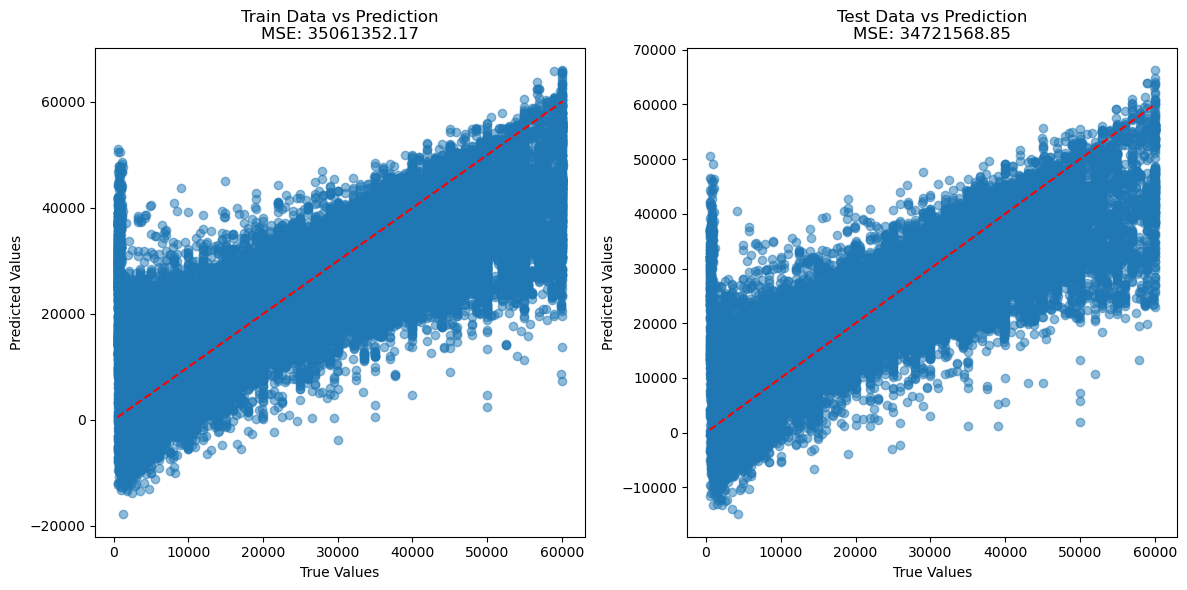

33663616.089999326
33354620.78719088


In [23]:
# Use Lasso Feature Selection

X_train, X_test, y_train, y_test = refreshTrainData()
sequential_pipe = Pipeline([
    ('poly_features', PolynomialFeatures(degree = 1, include_bias = False)),
    ('selector', SelectFromModel(Lasso())),
    ('linreg', LinearRegression())])
sequential_pipe.fit(X_train, y_train)

# Make predictions
train_predictions = sequential_pipe.predict(X_train)
test_predictions = sequential_pipe.predict(X_test)

# Plotting
plt.figure(figsize=(12, 6))

# Train data vs Prediction
plt.subplot(1, 2, 1)
plt.scatter(y_train, train_predictions, alpha=0.5)
plt.title(f'Train Data vs Prediction\nMSE: {model_train_mse:.2f}')
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.plot([min(y_train), max(y_train)], [min(y_train), max(y_train)], 'r--')  # Perfect prediction line

# Test data vs Prediction
plt.subplot(1, 2, 2)
plt.scatter(y_test, test_predictions, alpha=0.5)
plt.title(f'Test Data vs Prediction\nMSE: {model_test_mse:.2f}')
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'r--')  # Perfect prediction line

plt.tight_layout()
plt.show()

model_train_mse = mean_squared_error(y_train, train_predictions)
model_test_mse = mean_squared_error(y_test, test_predictions)
print(model_train_mse)
print(model_test_mse)

In [25]:
# Use Ridge alpha tuning
df = refreshData()[[*selected_feature_names, "price"]]
X_train, X_test, y_train, y_test = split_data(df)

alphas = np.linspace(0, 1, 11)
print(alphas)
results = []
for alpha in alphas:
    ridge = Ridge(alpha = alpha)
    sequential_pipe = Pipeline([
        ('poly_features', PolynomialFeatures(degree = 1, include_bias = False)),
        ('linreg', Ridge(alpha = alpha))])
    
    sequential_pipe.fit(X_train, y_train)

    model_train_mse = mean_squared_error(y_train, sequential_pipe.predict(X_train))
    model_test_mse = mean_squared_error(y_test, sequential_pipe.predict(X_test))
    results.append({'alpha': alpha, 'train_mse': model_train_mse, 'test_mse': model_test_mse})
    
results_df = pd.DataFrame(results)
results_df

[0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1. ]


,alpha,train_mse,test_mse
0,0.0,3.506135e+07,3.472157e+07
1,0.1,3.506135e+07,3.472157e+07
2,0.2,3.506135e+07,3.472157e+07
3,0.3,3.506135e+07,3.472157e+07
4,0.4,3.506135e+07,3.472157e+07
5,0.5,3.506135e+07,3.472156e+07
6,0.6,3.506135e+07,3.472156e+07
7,0.7,3.506135e+07,3.472156e+07
8,0.8,3.506135e+07,3.472156e+07
9,0.9,3.506135e+07,3.472156e+07


# Evaluation

With some modeling accomplished, we aim to reflect on what we identify as a high-quality model and what we are able to learn from this.  We should review our business objective and explore how well we can provide meaningful insight into drivers of used car prices.  Your goal now is to distill your findings and determine whether the earlier phases need revisitation and adjustment or if you have information of value to bring back to your client.

### Model Performance & Insights
Our analysis indicated that there are many factors that influence used car prices:
Primary Drivers:
- Model – The specific model of the vehicle play the most significant role in determining price, as expected.
- Odometer – Mileage strongly correlates with depreciation; higher mileage tends to reduce a vehicle’s value.
- Year – Newer vehicles generally hold higher value, while older models depreciate over time.

Secondary Factors:
- Type – The body style (e.g., sedan, SUV, truck) impacts pricing based on market demand and utility.
- Transmission Type – While automatic transmissions generally command a higher price than a manual transmission. A transmission type outside of these 2 categories (Other) generally has the strongest correlation with a car's purchase price.
- Fuel Type – While we didn't have enough hyrbid or electric cars in our dataset to use, we do still see a clear indication that gas and diesel cars tend to correlate with a higher sales value.
- Location – Regional factors such as climate, road conditions, and demand patterns influence pricing. Likely this is due to the location of sale and won't be of much use to a dealership in one particular region.
- Manufacturer – The brand reputation, reliability, and perceived quality seem to contribute to value retention.

### Business Value & Actionability
The insights derived from our model offer tangible business value despite the fact that our model's accuracy is still limited.
The current feature set captures many key pricing drivers and our data has shown us that there a large number of elements that influence a car's resale price. However, incorporating additional  (e.g., accident history, service records) would enhance model accuracy. In addition, there are many categorical values in our dataset we were not able to use due to our limited amount of data. Including my items in our dataset to cover these missing values would improve our predictions.

### Next steps
A model to predict a car's sales price is useful but will not tell us the full story about our dealership's revenue. Assuming we have limited capacity in our lot, stocking it full of expensive cars that do not sell frequently would not be fruitful endeavor. Any car on our lot is taking up space that could be filled by another car, so it is in the dealership's best interest to find cars with a good sales price that sell frequently.
I would urge the client to collect addition data around how long a car has been at the dealership before being sold. This will allow us to create a new model to predict a car's value per day at the dealership. For instance, a $10,000 car that take 30 days would be less valuable per day on the lot than a $2,000 car that sells in 5 days.

# Deployment

Now that we've settled on our models and findings, it is time to deliver the information to the client.  You should organize your work as a basic report that details your primary findings.  Keep in mind that your audience is a group of used car dealers interested in fine-tuning their inventory.

# Objective
The primary goal of this project was to develop a predictive model for used car prices, providing meaningful insights into the key factors that drive valuation.

# Analysis
#### Data Cleaning:
Removed missing or inconsistent entries to ensure data integrity. While we were able to visually identify several categorical features that needed cleaning, we tried to use algorithmic methods to determine how to clean our data.
#### Feature Engineering:
We tranformed categorical columns using three encoding techinique:
    - ordinal encoding
    - one hot encoding
    - target encoding
Additionally, we added new "popularity" features to certain categories based on the frequency of those categories in our dataset.

#### Correlation Analysis:
We looked at the correlation of all of our converted features to the price to determine which we should consider modeling. This was necessary because we had too many features to model in reasonable time complexity.
Model Selection: Evaluated multiple algorithms with Linear Regression using the following techniques: 
    - polynomial feature expansion
    - sequential feature selection
    - Lasso feature selection
    - Ridge

    
# Model
Our final model is a linear regression model that uses 5 sequentially selected features. While we did see that a polynomial feature expansion of 6 gave us a lower MSE for our test data, our sequential feature selection did not pick any features from a degree higher than 1. I believe we can safely remove polynomial feature selection from our model without compromised our accuracy. That being said, I am still not happy with the MSE result of this model. While it has helped us accurately predict some key drivers of price, it is not the most effective yet as a full predicition model.

<!-- For the Grader: My predictions did not turn out as accurately as I'd hoped. Any insight into what I can add/change to improve my model would be greatly appreciated!  -->

# Evaluation
Our analysis indicated that there are many factors that influence used car prices:
### Primary Drivers:
- Model – The specific model of the vehicle play the most significant role in determining price, as expected.
- Odometer – Mileage strongly correlates with depreciation; higher mileage tends to reduce a vehicle’s value.
- Year – Newer vehicles generally hold higher value, while older models depreciate over time.

### Secondary Factors:
- Type – The body style (e.g., sedan, SUV, truck) impacts pricing based on market demand and utility.
- Transmission Type – While automatic transmissions generally command a higher price than a manual transmission. A transmission type outside of these 2 categories (Other) generally has the strongest correlation with a car's purchase price.
- Fuel Type – While we didn't have enough hyrbid or electric cars in our dataset to use, we do still see a clear indication that gas and diesel cars tend to correlate with a higher sales value.
- Location – Regional factors such as climate, road conditions, and demand patterns influence pricing. Likely this is due to the location of sale and won't be of much use to a dealership in one particular region.
- Manufacturer – The brand reputation, reliability, and perceived quality seem to contribute to value retention.
# Conclusion
The insights derived from our model offer tangible business value despite the fact that our model's accuracy is still limited.
The current feature set captures many key pricing drivers and our data has shown us that there a large number of elements that influence a car's resale price. However, incorporating additional  (e.g., accident history, service records) would enhance model accuracy. In addition, there are many categorical values in our dataset we were not able to use due to our limited amount of data. Including my items in our dataset to cover these missing values would improve our predictions.

# Next steps
A model to predict a car's sales price is useful but will not tell us the full story about our dealership's revenue. Assuming we have limited capacity in our lot, stocking it full of expensive cars that do not sell frequently would not be fruitful endeavor. Any car on our lot is taking up space that could be filled by another car, so it is in the dealership's best interest to find cars with a good sales price that sell frequently.
I would urge the client to collect addition data around how long a car has been at the dealership before being sold. This will allow us to create a new model to predict a car's value per day at the dealership. For instance, a $10,000 car that take 30 days would be less valuable per day on the lot than a $2,000 car that sells in 5 days.